In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

In [60]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '/data/ephemeral/home/data/train.csv'
test_path  = '/data/ephemeral/home/data/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [8]:
dt_test.shape

(9272, 51)

In [4]:
#dt.loc[dt['k-135㎡초과'] != 'NaN', 'k-135㎡초과'].sample(10) # 오류 코드드
dt.loc[dt['k-135㎡초과'].notna(), 'k-135㎡초과'].value_counts()

70.0    327
Name: k-135㎡초과, dtype: int64

In [5]:
dt.loc[dt['k-85㎡~135㎡이하'].notna(), 'k-85㎡~135㎡이하'].sample(5)

365987    199.0
562491      0.0
607776      0.0
69157      85.0
765567    182.0
Name: k-85㎡~135㎡이하, dtype: float64

## 아파트 이름


In [7]:
a = dt['아파트명'].unique().tolist()
print(a, len(a))

['개포6차우성', '개포우성3차', '개포자이', '개포주공1단지', '개포주공5단지', '개포주공6단지', '동양파라곤', '마일스디오빌', '아크로힐스논현', '대치삼성', '대치현대', '대치효성', '래미안대치하이스턴', '롯데캐슬리베', '테헤란로대우아이빌', '도곡렉슬', '도곡쌍용예가', '도곡우성', '래미안도곡카운티', '대치아이파크', '은마', '개포주공4단지', '개포주공7단지', '개포현대200동', '경남1', '경남2차', '뉴현대파크빌', '리치타운', '삼익대청', '새롬', '성원대치2단지', '시영', '아람손프라자/비바빌', '에버그린', '우성8', '우성9차', '우찬현대', '현대', '현대1차101동~106동', '현대2', 'e-편한세상', '거평프리젠', '경남논현', '골든캐슬', '논현동월드메르디앙', '논현동프라임', '논현동한화꿈에그린', '논현라폴리움', '논현베르빌', '논현빌라트', '논현아트빌', '논현웰스톤', '논현파라곤', '논현프라임', '논현한가람빌라트', '동부센트레빌', '동현', '두산위브1단지', '두산위브2단지', '두영', '벨러스빌', '브라운스톤', '스위트캐슬레지던스', '신동아', '쌍용', '우민', '우성', '월드쉐르빌', '이산', '이움빌라', '지고하임', '청학', '케럿스테이트', '케이씨빌', '토미빌', '프라임', '학동', '한양빌라트', '한양수자인어반게이트', '한진로즈힐', '한화꿈에그린2차', '현대넥서스A동', '현대인텔렉스', '개포우성1', '개포우성2', '대우아이빌멤버스', '대우아이빌명문가', '대치SKVIEW', '대치동우정에쉐르1', '대치동우정에쉐르2', '대치우성', '대치하나빌', '대치한신휴플러스', '동민맥스빌A동', '동민맥스빌B동', '동양', '래미안대치팰리스', '롯데캐슬', '메트로', '삼성2차', '삼성3차', '선경1차', '선경2차', '선경3차', '선릉역대우아이빌', '선릉역풍림아이원레몬', '세연파크

In [25]:
# 계약년월
# a = dt['계약년월'].pd.to_datetime
dt['계약연'] = dt['계약년월'].astype(str).str[:4]
# dt['계약월'] = dt['계약년월'].astype(str).str[4:]
dt=dt.sort_values('계약연', ascending=True)

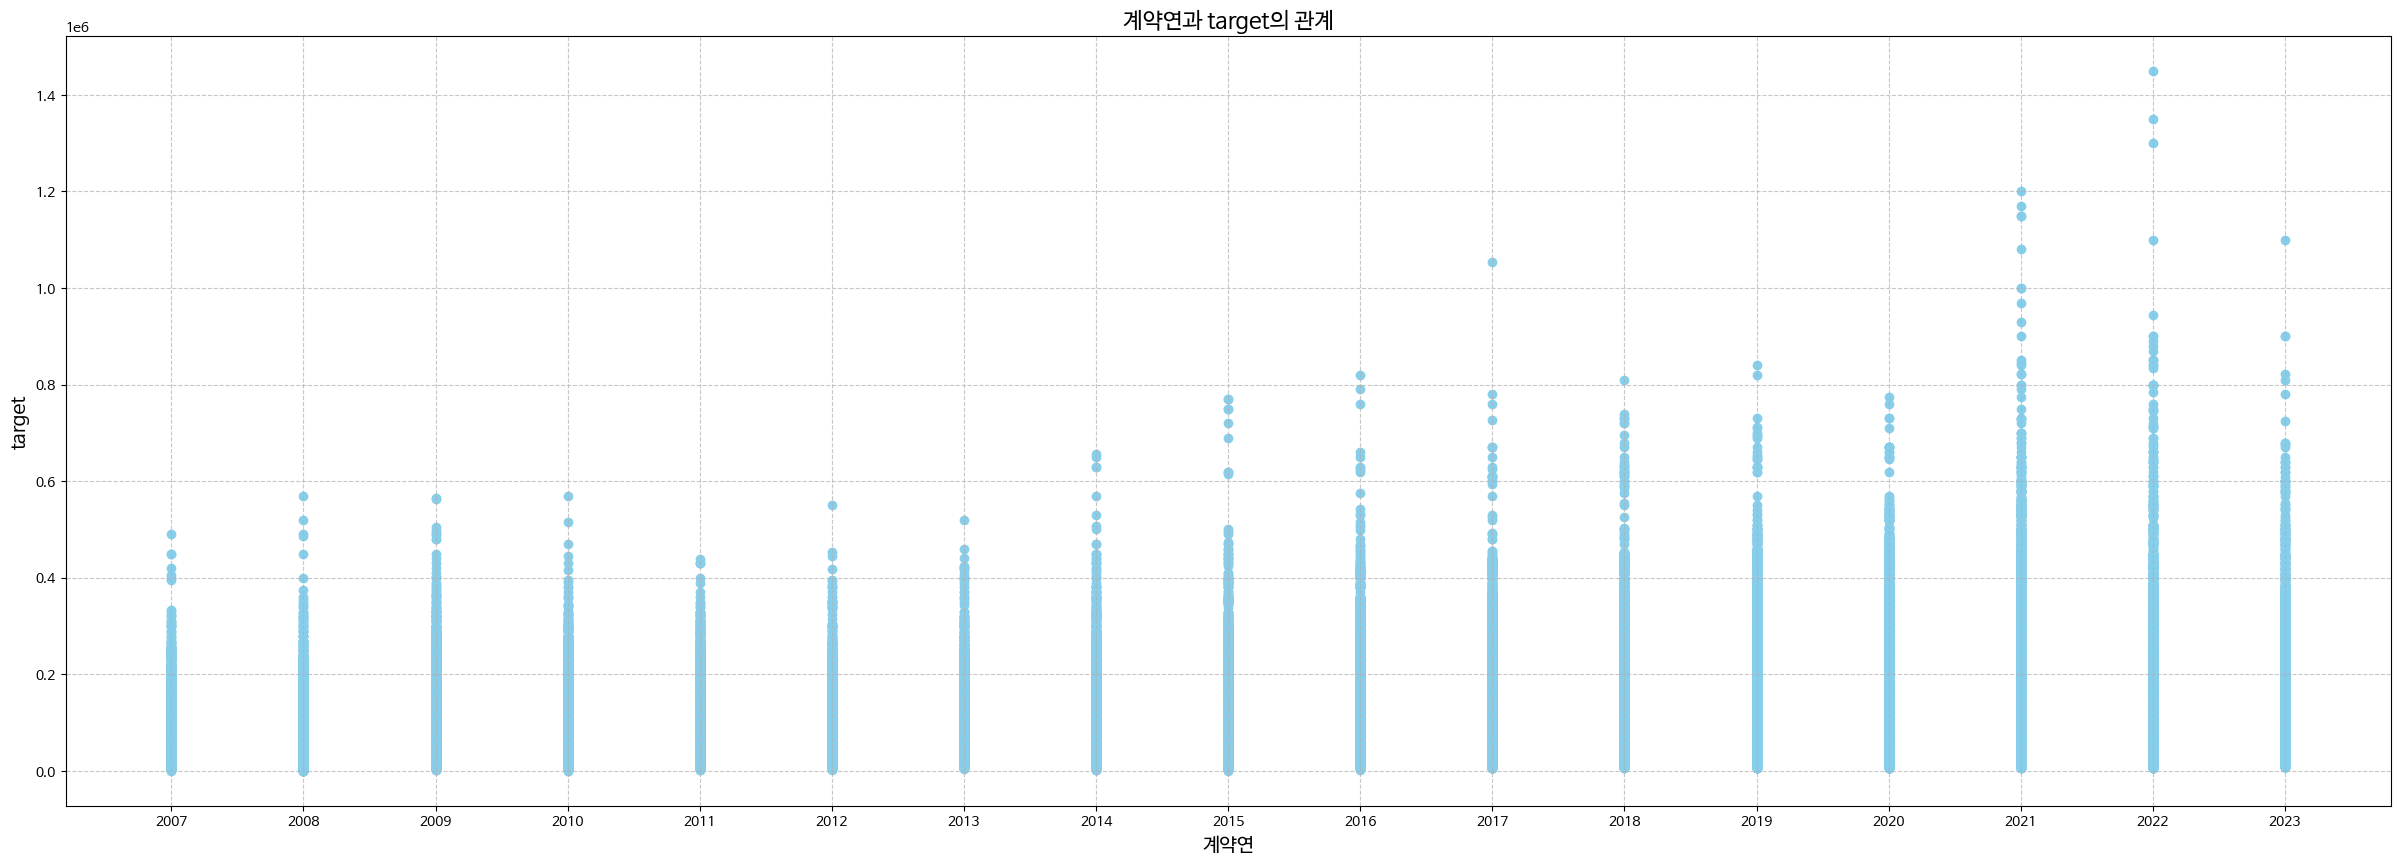

In [26]:
get_plot('계약연', 'target', 30, 10,plot = True)

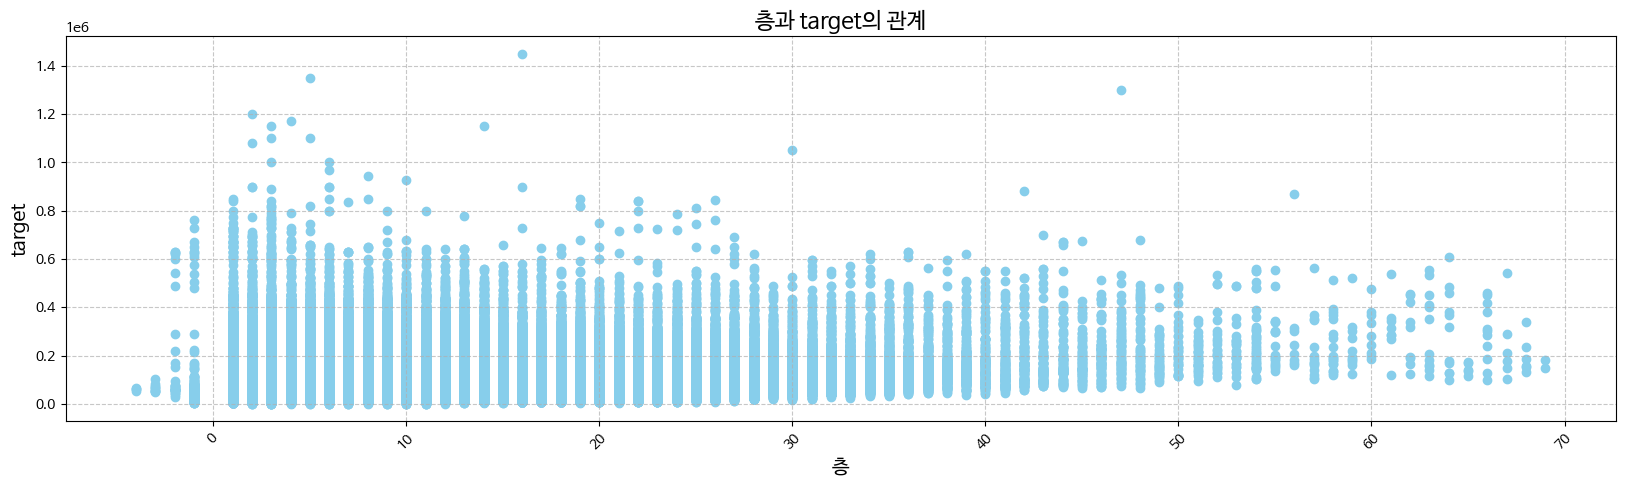

In [65]:
get_plot('층', 'target', 20, 5, plot = True, rotation = 45)

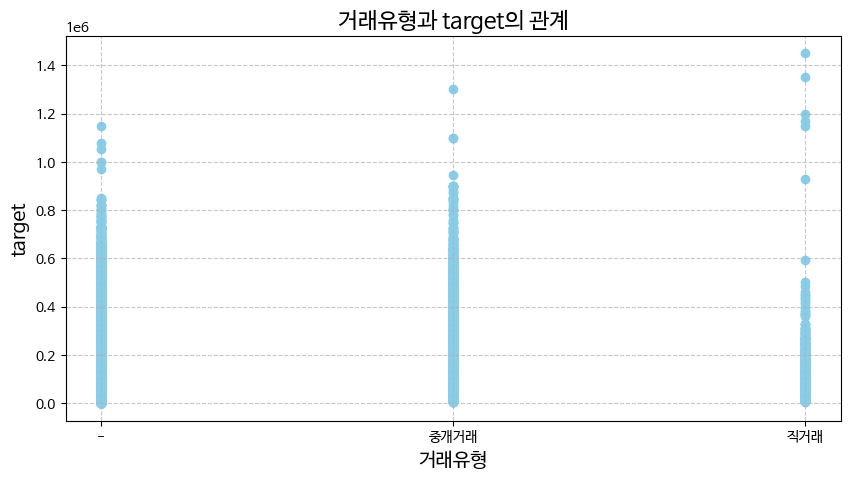

In [67]:
get_plot('거래유형','target', 10, 5, plot=True)

---

구분선

---

In [4]:
dt.columns

Index(['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도',
       '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', 'k-단지분류(아파트,주상복합등등)',
       'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형',
       'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일',
       'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)',
       'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-135㎡초과', 'k-홈페이지',
       'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태',
       '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드',
       '좌표X', '좌표Y', '단지신청일', 'target'],
      dtype='object')

In [7]:
dt.isnull().sum()[:25]

시군구                         0
번지                        225
본번                         75
부번                         75
아파트명                     2126
전용면적(㎡)                     0
계약년월                        0
계약일                         0
층                           0
건축년도                        0
도로명                         0
해제사유발생일               1112839
등기신청일자                      0
거래유형                        0
중개사소재지                      0
k-단지분류(아파트,주상복합등등)     870691
k-전화번호                 870274
k-팩스번호                 872742
단지소개기존clob            1050240
k-세대타입(분양형태)           869563
k-관리방식                 869563
k-복도유형                 869890
k-난방방식                 869563
k-전체동수                 870630
k-전체세대수                869563
dtype: int64

In [12]:
dt.isnull().sum()[25:]

k-건설사(시공사)                 871058
k-시행사                      871254
k-사용검사일-사용승인일              869696
k-연면적                      869563
k-주거전용면적                   869608
k-관리비부과면적                  869563
k-전용면적별세대현황(60㎡이하)         869608
k-전용면적별세대현황(60㎡~85㎡이하)     869608
k-85㎡~135㎡이하               869608
k-135㎡초과                  1118495
k-홈페이지                    1005647
k-등록일자                    1107832
k-수정일자                     869608
고용보험관리번호                   913304
경비비관리형태                    870988
세대전기계약방법                   878747
청소비관리형태                    871178
건축면적                       869714
주차대수                       869714
기타/의무/임대/임의=1/2/3/4        869563
단지승인일                      870286
사용허가여부                     869563
관리비 업로드                    869563
좌표X                        869670
좌표Y                        869670
단지신청일                      869625
target                          0
dtype: int64

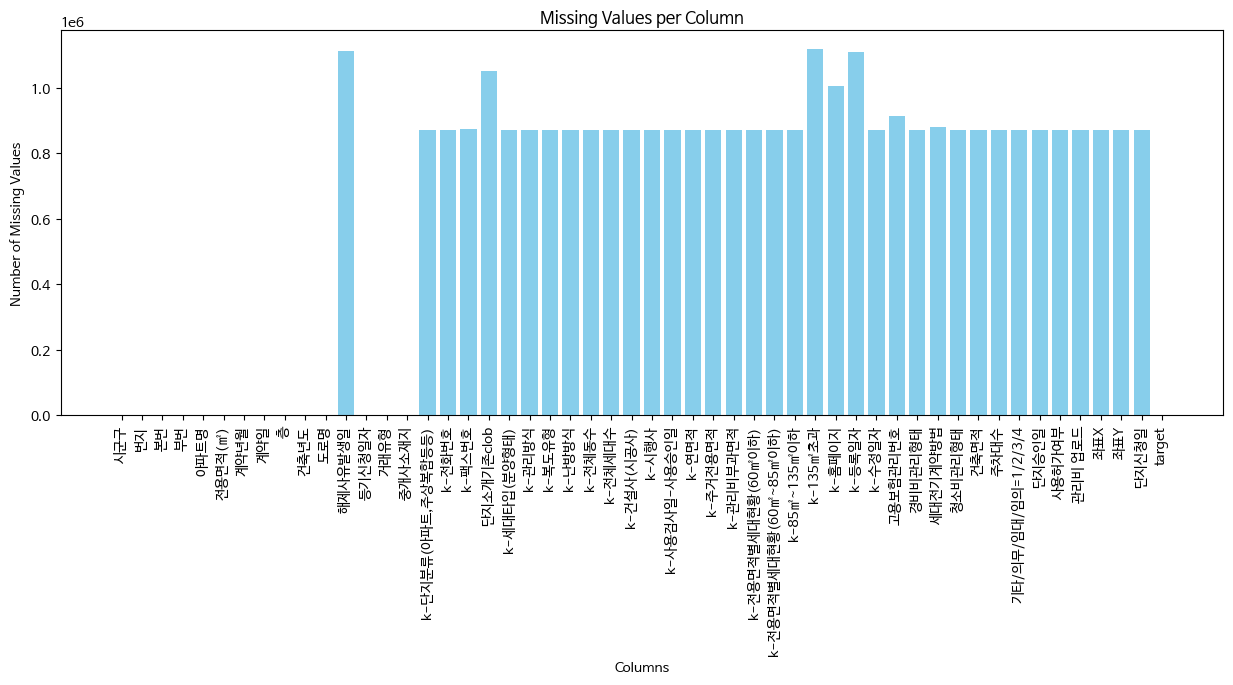

In [40]:
import matplotlib.pyplot as plt
x = dt.columns
y = dt.isnull().sum()
plt.figure(figsize=(15, 5))
plt.bar(x, y, color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.xticks(rotation=90)  # 필요시 x축 라벨 회전
plt.show()

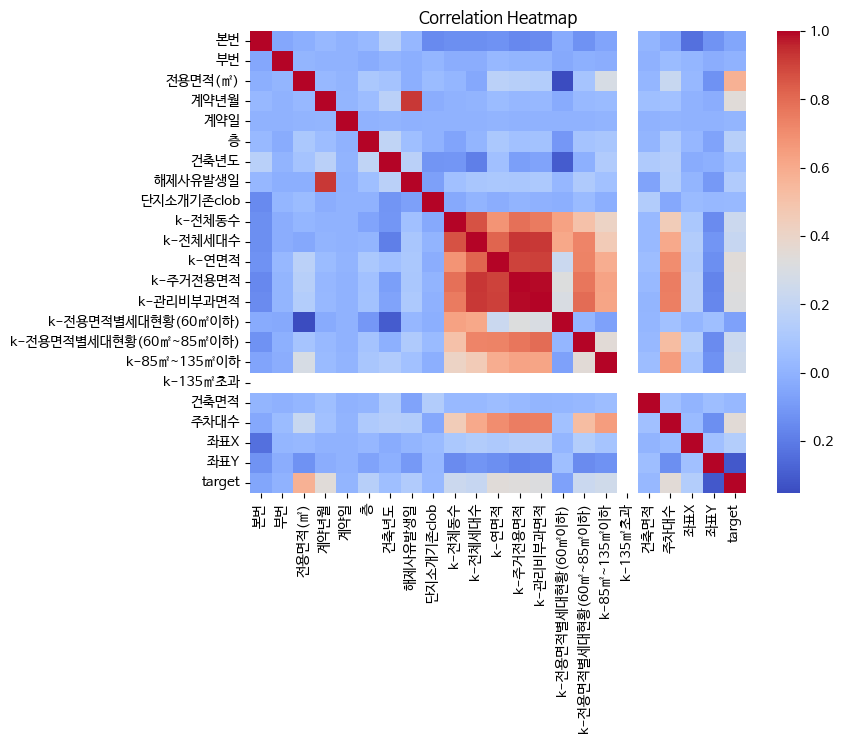

In [29]:
import seaborn as sns
correlation_matrix = dt.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
dt[dt.isnull().sum(axis=1)<=20]

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,...,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,124000
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,123500
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,91500
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,130000
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.057210,37.476763,2022-11-17 10:19:06.0,117000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118817,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200707,12,11,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118818,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,59.94,200708,25,10,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,20000
1118819,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200708,31,20,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,28000
1118820,서울특별시 은평구 구산동,382,382.0,0.0,갈현현대,84.83,200709,15,8,1998,...,0.0,366.0,의무,2013-06-04 16:18:51.0,Y,N,126.905638,37.612962,2013-03-07 09:46:27.0,29000


In [34]:
dt['해제사유발생일'].isnull().sum()

1112839

In [35]:
dt[['해제사유발생일','target']]

,해제사유발생일,target
0,NaN,124000
1,NaN,123500
2,NaN,91500
3,NaN,130000
4,NaN,117000
...,...,...
1118817,NaN,20000
1118818,NaN,20000
1118819,NaN,28000
1118820,NaN,29000


In [80]:
dt_cancel = dt[['해제사유발생일','target']].copy()
dt_cancel['해제사유발생일'].fillna(0, inplace=True)
dt_cancel['해제사유발생일'].value_counts()

0.0           1112839
20220211.0        151
20200727.0         43
20200714.0         40
20200720.0         37
               ...   
20230821.0          1
20210717.0          1
20230304.0          1
20230827.0          1
20221125.0          1
Name: 해제사유발생일, Length: 1026, dtype: int64

In [81]:
dt_cancel.loc[dt_cancel['해제사유발생일'] != 0.0, '해제사유발생일'] = 1

In [82]:
dt_cancel['해제사유발생일'].value_counts()

0.0    1112839
1.0       5983
Name: 해제사유발생일, dtype: int64

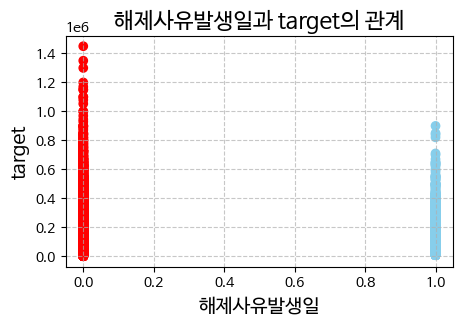

In [ ]:
import matplotlib.pyplot as plt

# Figure 설정
plt.figure(figsize=(5, 3))

# 데이터 설정
x = dt_cancel['해제사유발생일']
y = dt_cancel['target']

# 색상 설정 (해제사유발생일 값이 1인 경우 빨간색)
colors = ['red' if value == 0 else 'skyblue' for value in x]

# Scatter plot 생성
plt.scatter(x, y, c=colors)

plt.title('해제사유발생일과 target의 관계', fontsize=16)
plt.xlabel('해제사유발생일', fontsize=14)
plt.ylabel('target', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [89]:
dt['등기신청일자'].value_counts()

            1103907
20230630        585
20230428        394
20230831        391
20230530        367
             ...   
20230110          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: 등기신청일자, Length: 182, dtype: int64

In [11]:
dt['거래유형'].value_counts()

-       1086451
중개거래      29271
직거래        3100
Name: 거래유형, dtype: int64

In [21]:
dt_trade = dt.groupby('거래유형')['target'].mean()
dt_trade.head(5)

거래유형
-        56640.401515
중개거래    107599.854361
직거래      63105.090000
Name: target, dtype: float64

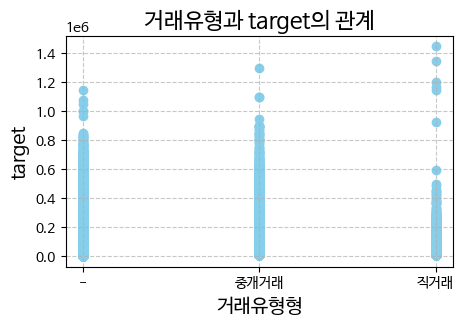

In [ ]:
import matplotlib.pyplot as plt

# Figure 설정
plt.figure(figsize=(5, 3))

# 데이터 설정
x = dt['거래유형']
y= dt['target']

colors = ['red' if value == 0 else 'skyblue' for value in x]

# Scatter plot 생성
plt.scatter(x, y, c=colors)

# 그래프 꾸미기
plt.title('거래유형과 target의 관계', fontsize=16)
plt.xlabel('거래유형형', fontsize=14)
plt.ylabel('target', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

# get_plot 함수

In [15]:
import matplotlib.pyplot as plt

def get_plot(x_col : str, y_col : str, figx = 5, figy = 3, plot = True, rotation = 0):
    if plot == True:
        # Figure 설정
        plt.figure(figsize=(figx, figy))

        # 데이터 설정
        x = dt[x_col]
        y= dt[y_col]

        mask = x.notna() & y.notna()  # NaN이 없는 데이터 필터링
        x = x[mask]
        y = y[mask]
        
        #colors = ['red' if value == 0 else 'skyblue' for value in x]
        colors = 'skyblue'
        # Scatter plot 생성
        plt.scatter(x, y, c=colors)

        # 그래프 꾸미기
        plt.title(f'{x_col}과 {y_col}의 관계', fontsize=16)
        plt.xlabel(f'{x_col}', fontsize=14)
        plt.ylabel(f'{y_col}', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.xticks(rotation=rotation)
        # 그래프 출력
        plt.show()
    else:
        print(dt[x_col].unique())

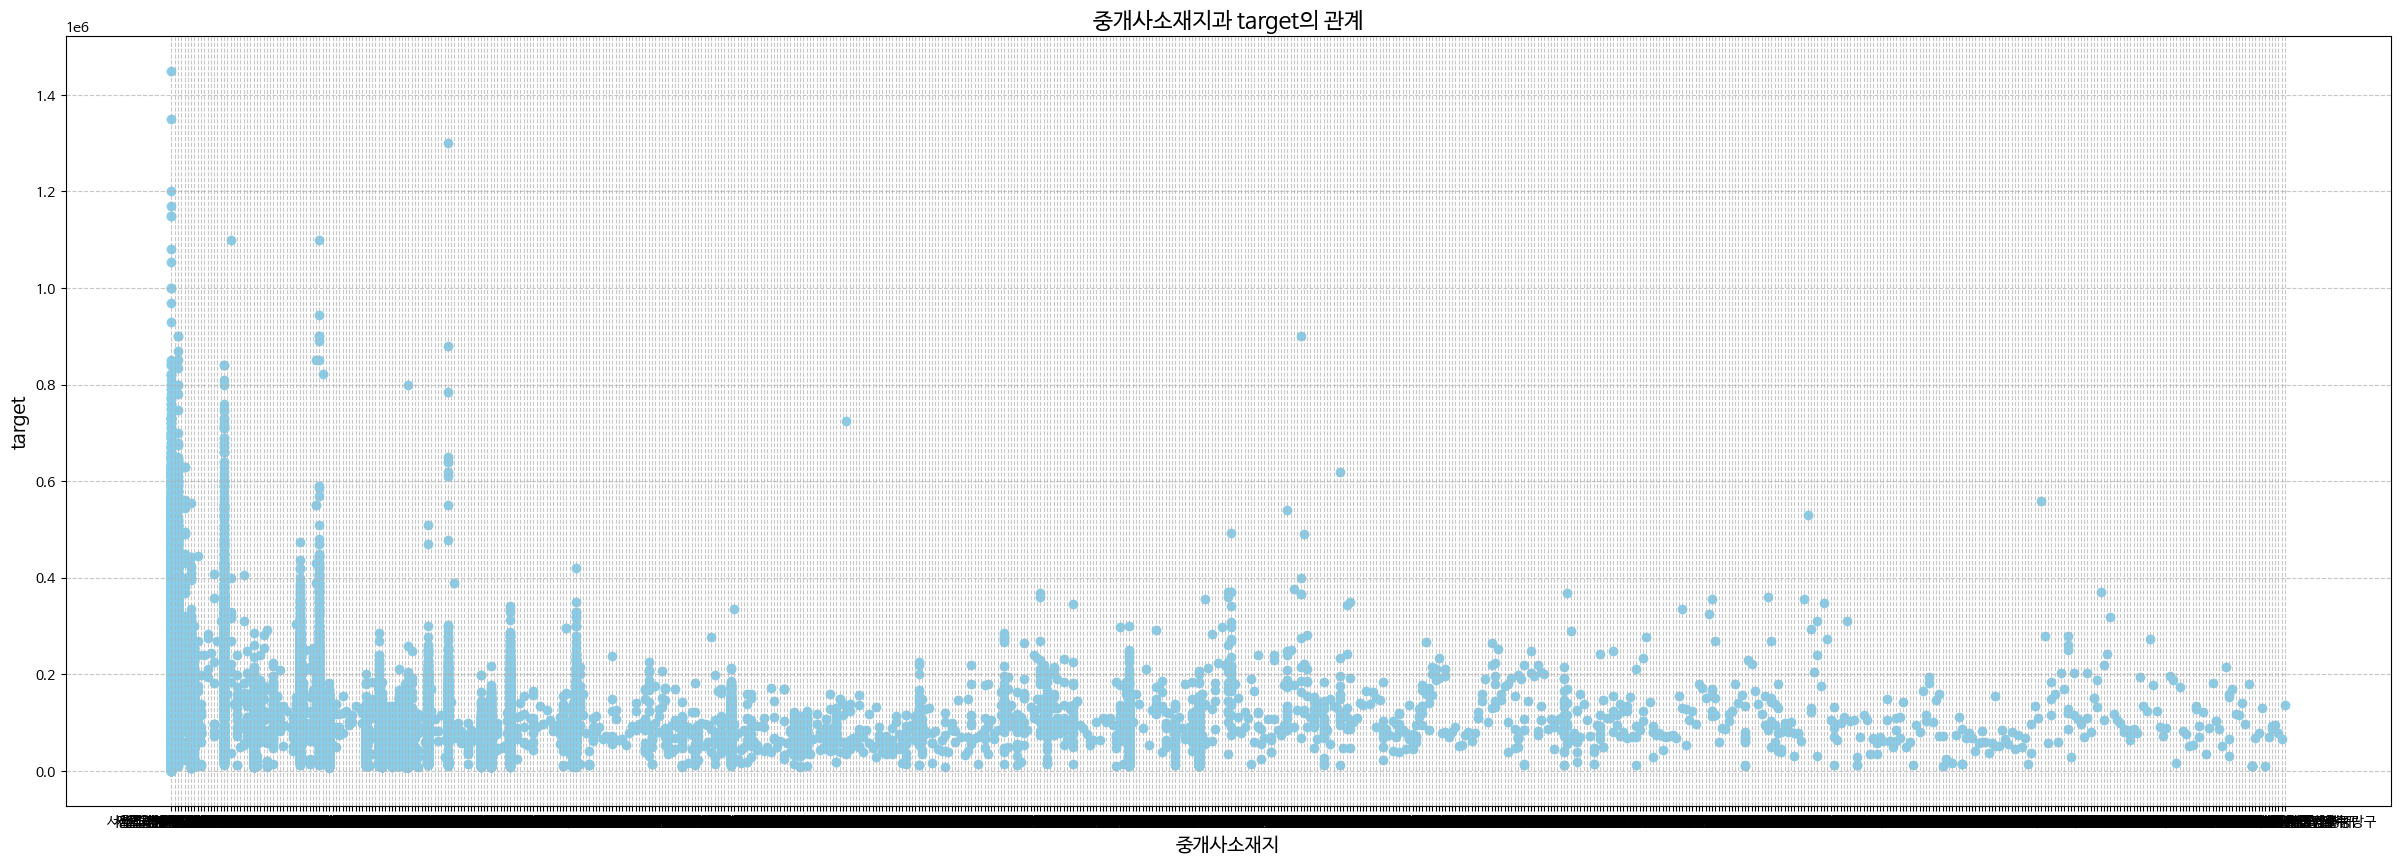

In [6]:
get_plot('중개사소재지', 'target', 30, 10, plot=True)

In [7]:
dt['중개사소재지'].unique()

array(['-', '서울 강남구, 서울 송파구', '서울 강남구', '서울 강남구, 서울 마포구',
       '서울 강남구, 서울 서초구', '서울 강남구, 인천 연수구', '서울 영등포구', '서울 동작구',
       '경기 성남분당구, 서울 강남구', '서울 강남구, 서울 동대문구', '대구 중구, 서울 강남구',
       '경기 수원영통구, 서울 강남구', '경기 수원팔달구, 서울 강남구', '서울 강남구, 서울 종로구',
       '서울 강남구, 인천 서구', '경기 과천시, 서울 강남구', '서울 서초구', '서울 강남구, 충남 천안서북구',
       '서울 강남구, 서울 용산구', '경기 안양동안구, 서울 강남구', '서울 강남구, 서울 강동구',
       '서울 강남구, 서울 금천구', '서울 강남구, 서울 영등포구', '서울 강남구, 서울 동작구',
       '경기 시흥시, 서울 강남구', '서울 강동구', '경기 하남시', '경기 하남시, 서울 강동구',
       '서울 강동구, 서울 서초구', '인천 서구', '대구 달성군, 서울 강동구', '서울 강동구, 서울 송파구',
       '서울 강동구, 서울 서대문구', '서울 강동구, 서울 성동구', '서울 강동구, 서울 성북구',
       '서울 강동구, 서울 용산구', '경기 화성시, 서울 강남구', '서울 강남구, 서울 강서구',
       '서울 강남구, 서울 광진구', '서울 송파구', '경기 하남시, 서울 송파구', '경기 용인수지구',
       '경기 성남분당구', '경기 성남수정구, 서울 송파구', '서울 강남구, 서울 성동구', '서울 용산구',
       '서울 강남구, 서울 성북구', '경기 남양주시, 서울 강동구', '서울 동대문구', '서울 강동구, 서울 마포구',
       '서울 강동구, 서울 동대문구', '서울 강동구, 서울 동작구', '경기 성남수정구, 서울 강동구',
       '서울 강동구, 충북 청주흥덕구', '

In [8]:
dt_trader = dt.groupby('중개사소재지')['target'].mean().sort_values(ascending=False)
#dt_trader = dt.groupby('중개사소재지')['target']
dt_trader = pd.DataFrame(dt_trader)
dt_trader.sample(5)

,target
중개사소재지,
"서울 강서구, 서울 용산구",325000.0
"경기 광명시, 서울 영등포구",96050.0
"서울 성북구, 서울 송파구",72150.0
"경기 고양덕양구, 서울 성동구",164000.0
"서울 관악구, 인천 연수구",89300.0


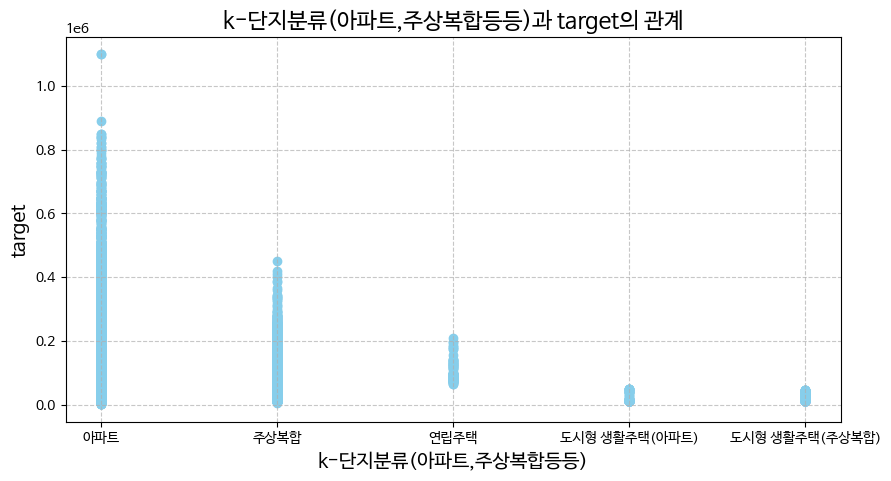

In [9]:
get_plot('k-단지분류(아파트,주상복합등등)', 'target', 10, 5, plot=True)

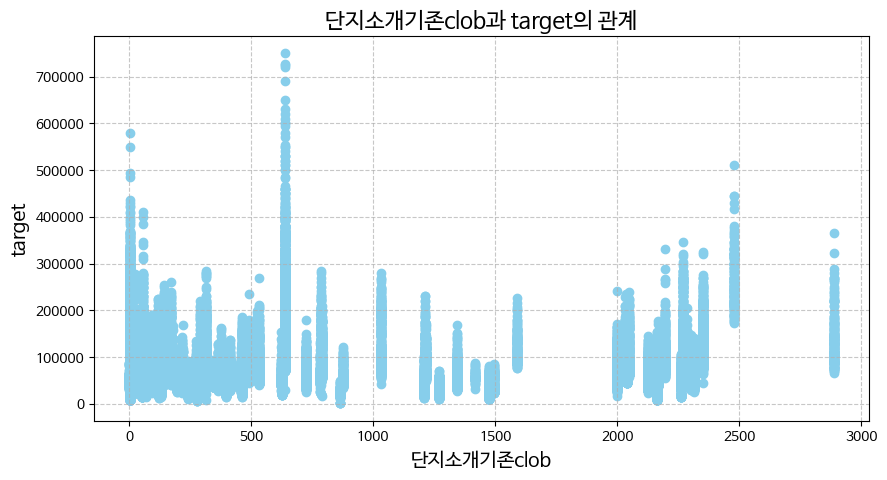

In [10]:
get_plot('단지소개기존clob', 'target', 10, 5, plot=True, rotation = 0)

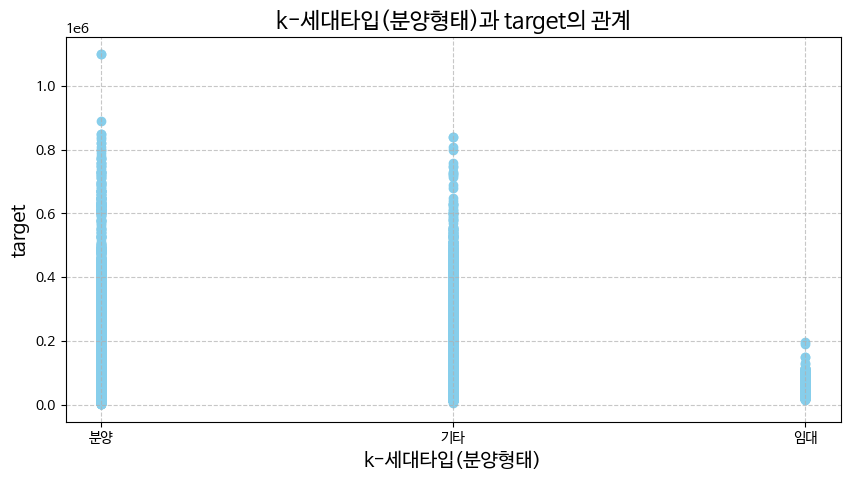

In [11]:
get_plot('k-세대타입(분양형태)', 'target', 10, 5, plot=True, rotation = 0)

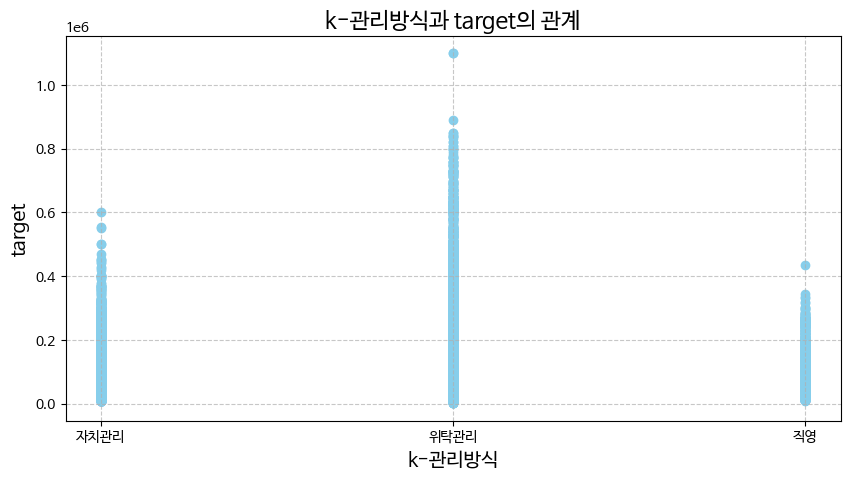

In [12]:
get_plot('k-관리방식', 'target', 10, 5, plot=True, rotation = 0)

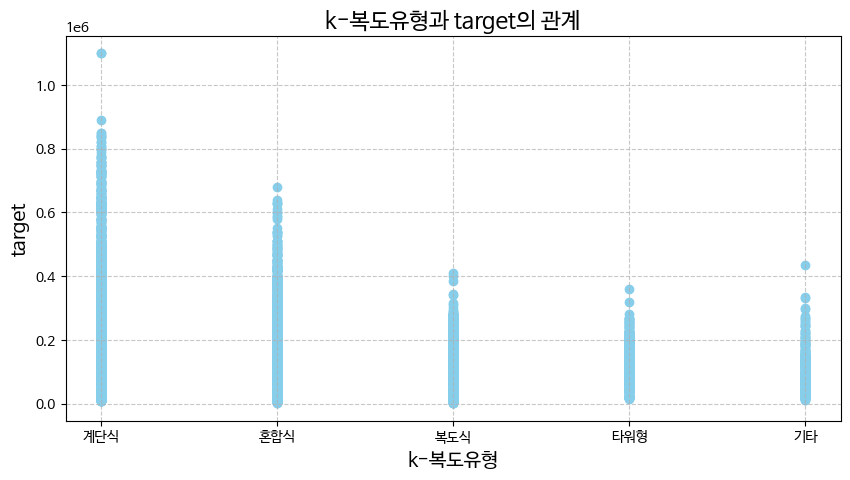

In [13]:
get_plot('k-복도유형', 'target', 10, 5, plot=True, rotation = 0)

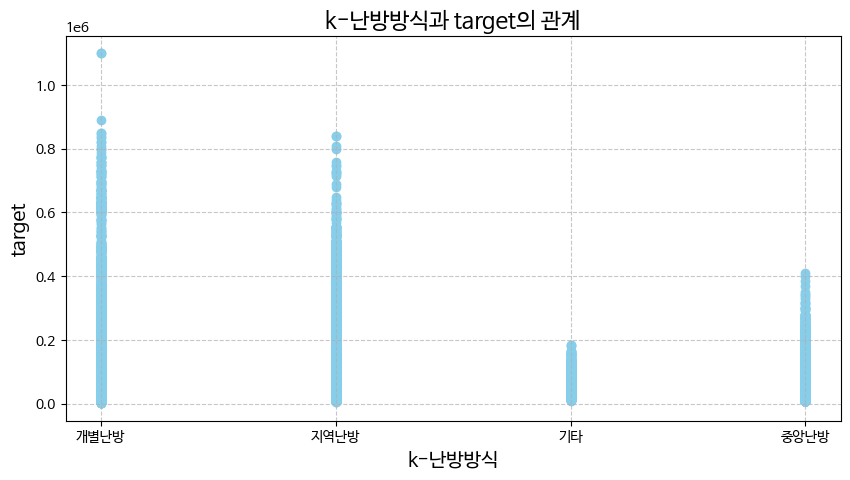

In [14]:
get_plot('k-난방방식', 'target', 10, 5, plot=True, rotation=0)

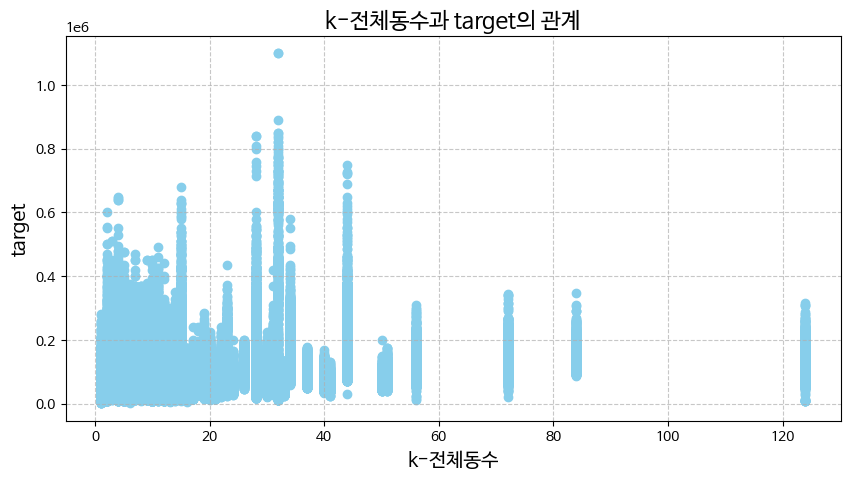

In [15]:
get_plot('k-전체동수', 'target', 10, 5, plot=True, rotation=0)

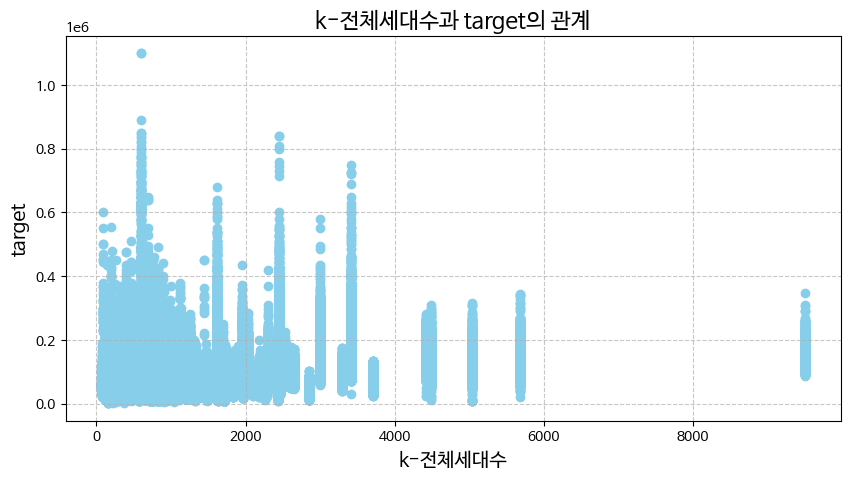

In [16]:
get_plot('k-전체세대수', 'target', 10, 5, plot=True, rotation=0)

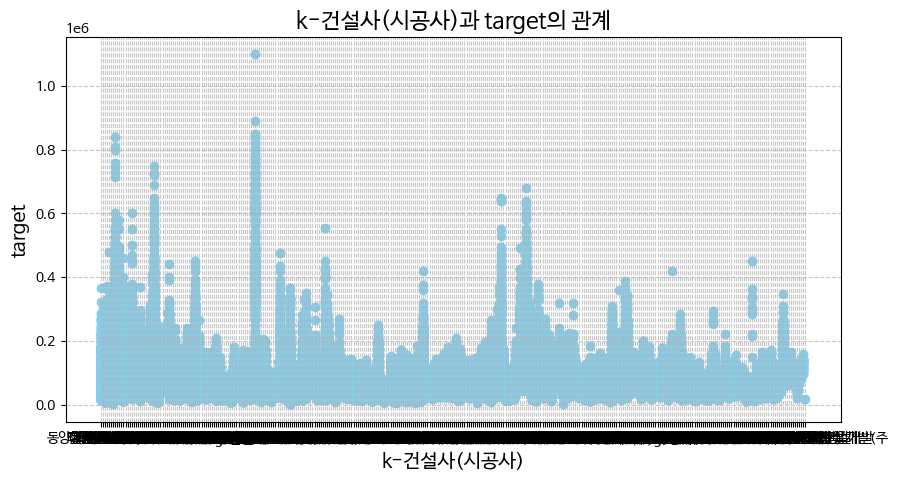

In [17]:
get_plot('k-건설사(시공사)', 'target', 10, 5, plot=True, rotation=0)

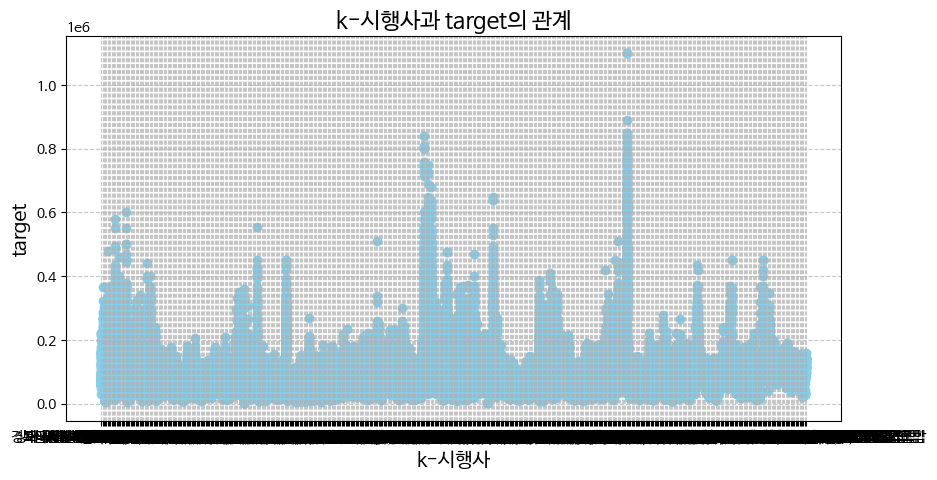

In [18]:
get_plot('k-시행사', 'target', 10, 5, plot=True, rotation=0)

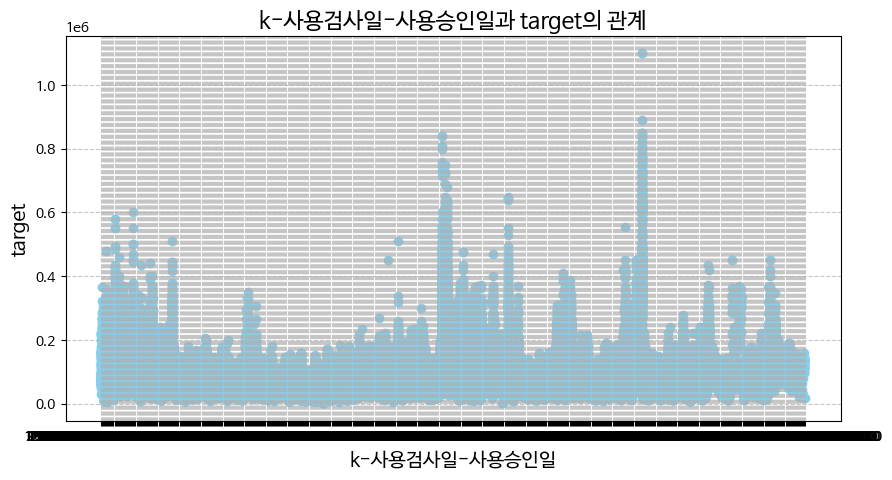

In [19]:
get_plot('k-사용검사일-사용승인일', 'target', 10, 5, plot=True, rotation=0)

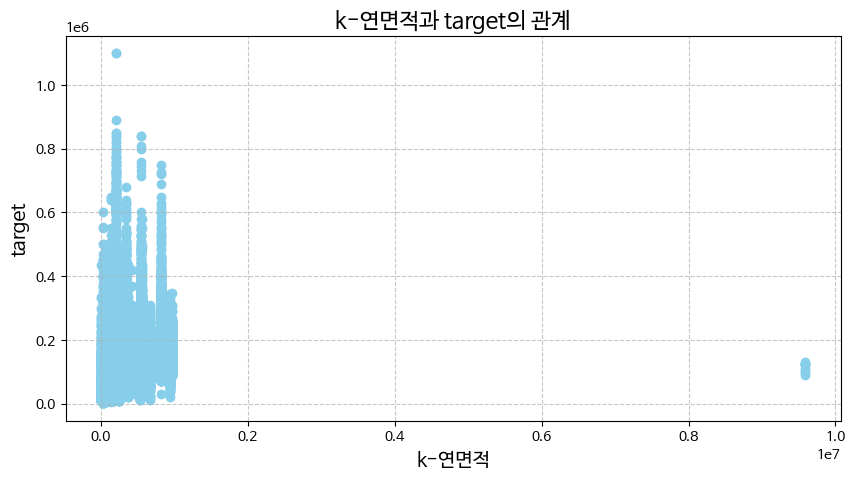

In [20]:
get_plot('k-연면적', 'target', 10, 5, plot=True, rotation=0)

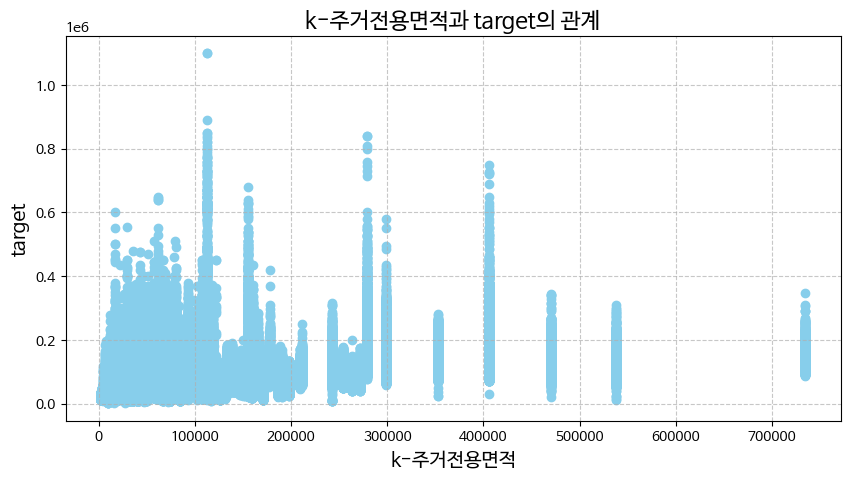

In [21]:
get_plot('k-주거전용면적', 'target', 10, 5, plot=True, rotation=0)

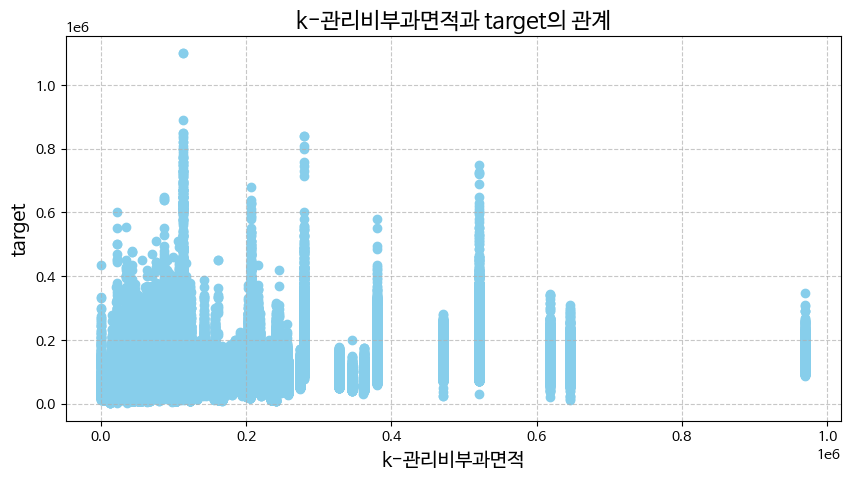

In [22]:
get_plot('k-관리비부과면적', 'target', 10, 5, plot=True, rotation=0)

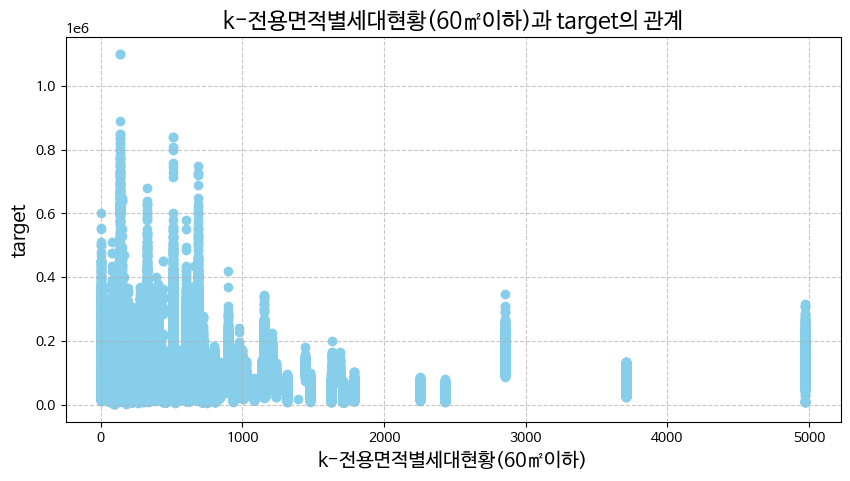

In [23]:
get_plot('k-전용면적별세대현황(60㎡이하)', 'target', 10, 5, plot=True, rotation=0)

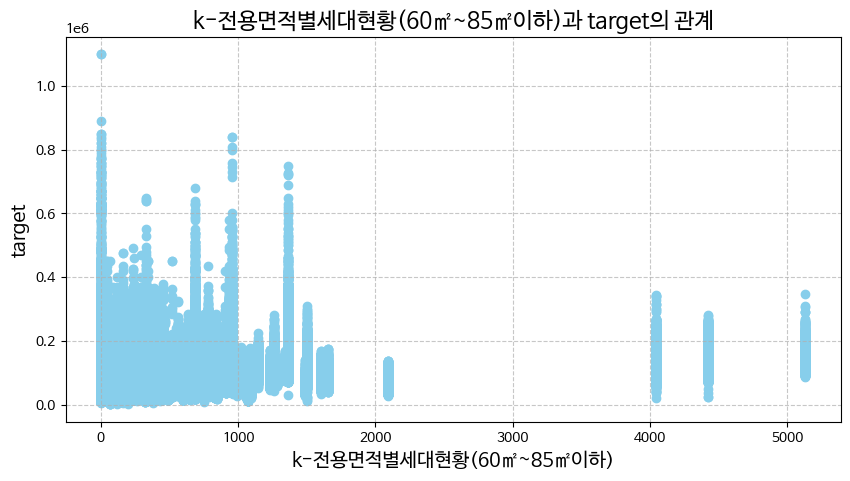

In [24]:
get_plot('k-전용면적별세대현황(60㎡~85㎡이하)', 'target', 10, 5, plot=True, rotation=0)

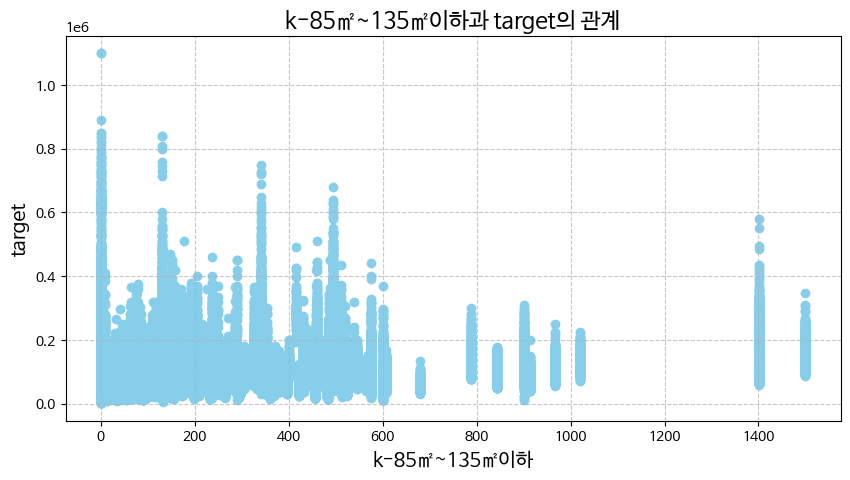

In [25]:
get_plot('k-85㎡~135㎡이하', 'target', 10, 5, plot=True, rotation=0)

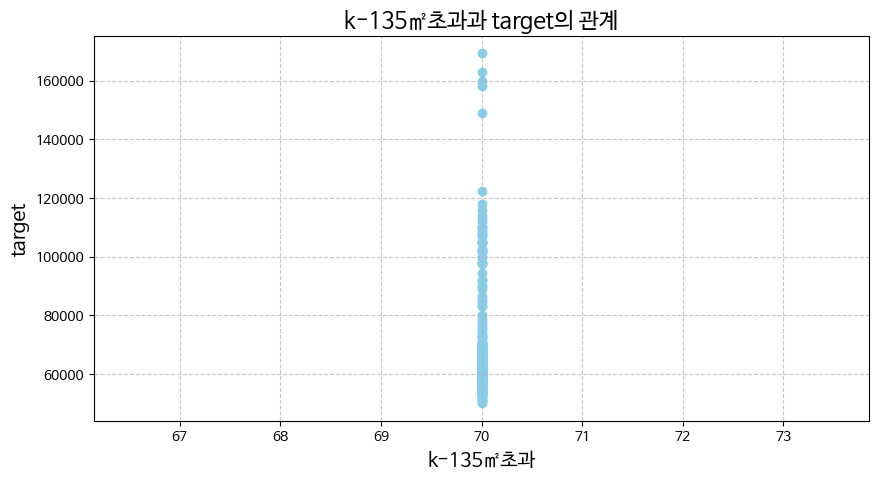

In [26]:
get_plot('k-135㎡초과', 'target', 10, 5, plot=True, rotation=0)

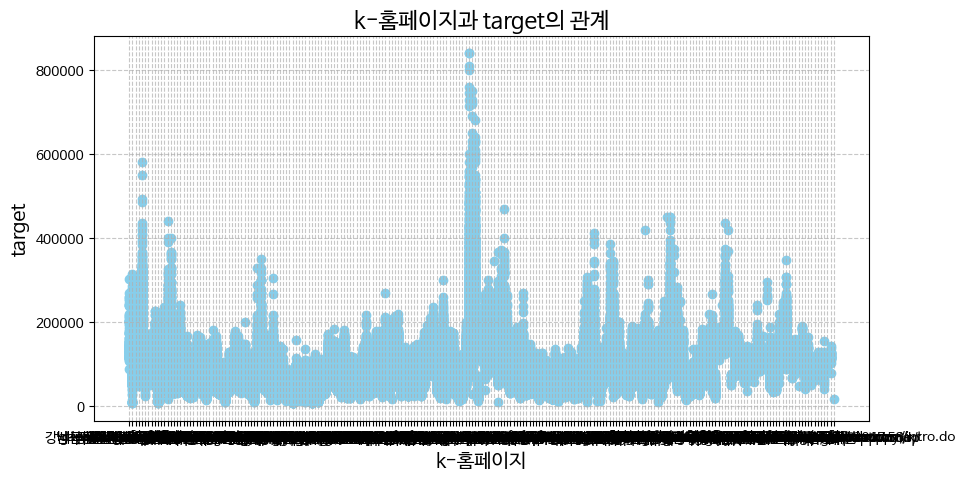

In [27]:
get_plot('k-홈페이지', 'target', 10, 5, plot=True, rotation=0)

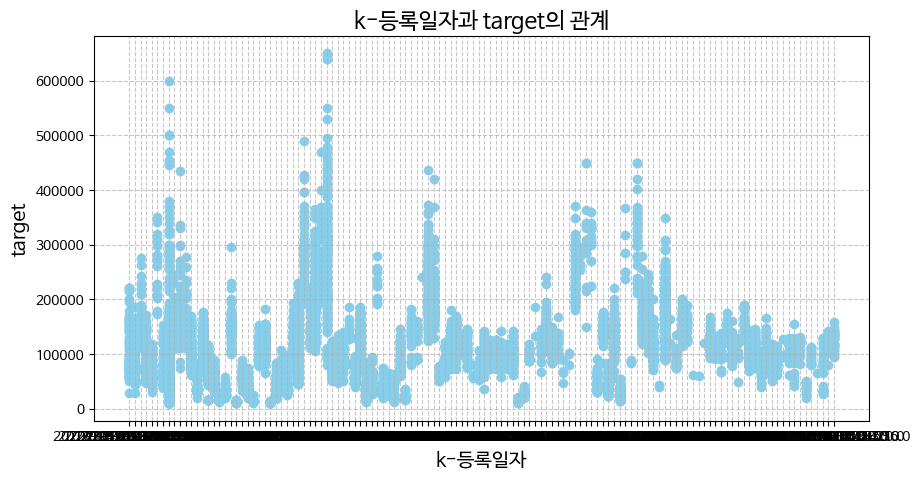

In [28]:
get_plot('k-등록일자', 'target', 10, 5, plot=True, rotation=0)

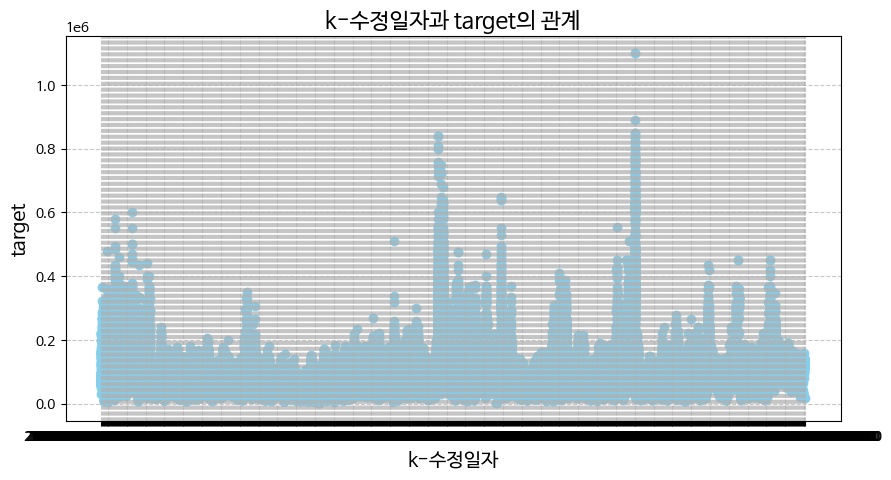

In [29]:
get_plot('k-수정일자', 'target', 10, 5, plot=True, rotation=0)

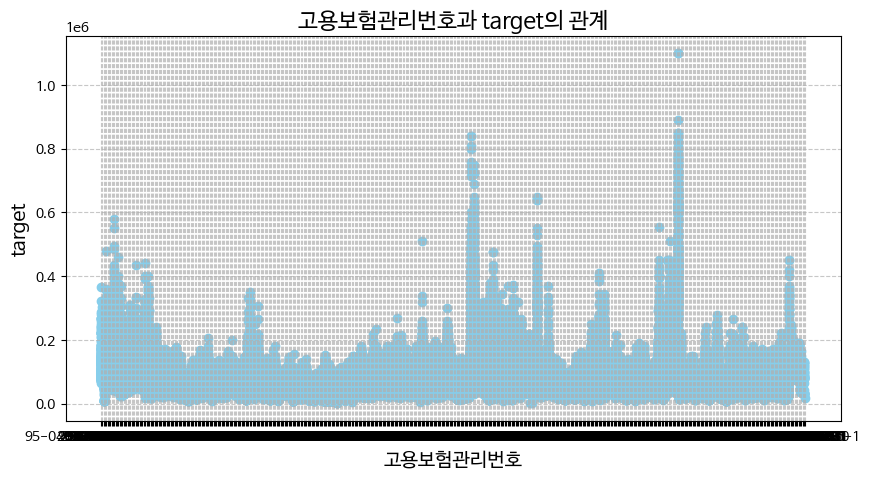

In [30]:
get_plot('고용보험관리번호', 'target', 10, 5, plot=True, rotation=0)

In [90]:
tmp = dt[['고용보험관리번호', 'target']].copy()
tmp = pd.DataFrame(tmp)
tmp.head()

,고용보험관리번호,target
0,NaN,124000
1,NaN,123500
2,NaN,91500
3,NaN,130000
4,NaN,117000


In [91]:
tmp['고용보험관리번호'] = tmp['고용보험관리번호'].fillna(0)
tmp.head(5)

,고용보험관리번호,target
0,0,124000
1,0,123500
2,0,91500
3,0,130000
4,0,117000


In [92]:
tmp['고용보험관리번호'] = tmp['고용보험관리번호'].apply(lambda x: 1 if x != 0 else 0)

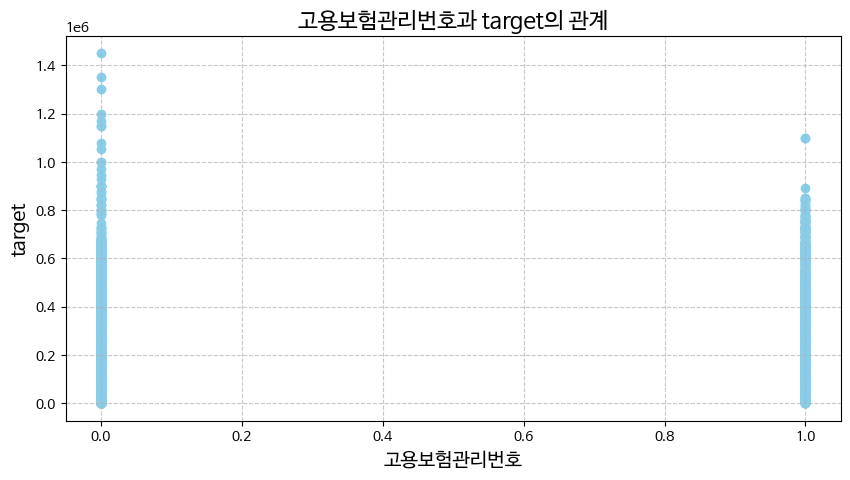

In [93]:
# Figure 설정
plt.figure(figsize=(10, 5))

# 데이터 설정
x = tmp['고용보험관리번호']
y= tmp['target']
colors = 'skyblue'
# Scatter plot 생성
plt.scatter(x, y, c=colors)

# 그래프 꾸미기
plt.title('고용보험관리번호과 target의 관계', fontsize=16)
plt.xlabel('고용보험관리번호', fontsize=14)
plt.ylabel('target', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
# 그래프 출력
plt.show()

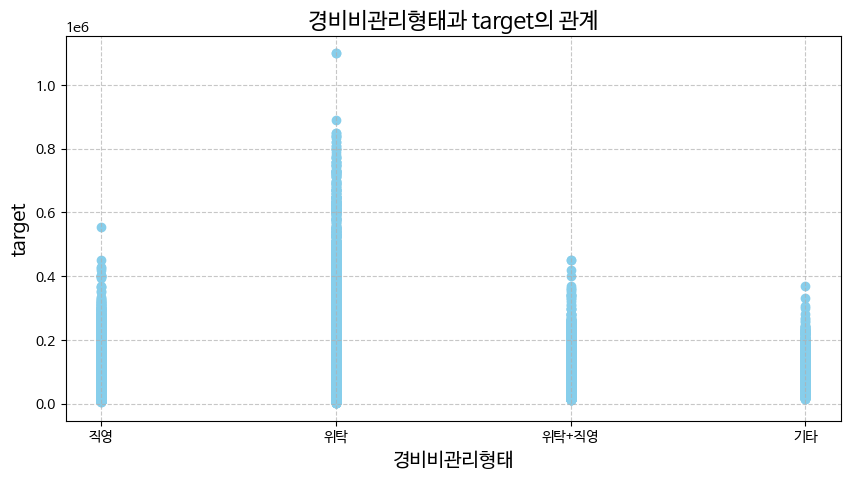

In [31]:
get_plot('경비비관리형태', 'target', 10, 5, plot=True, rotation=0)

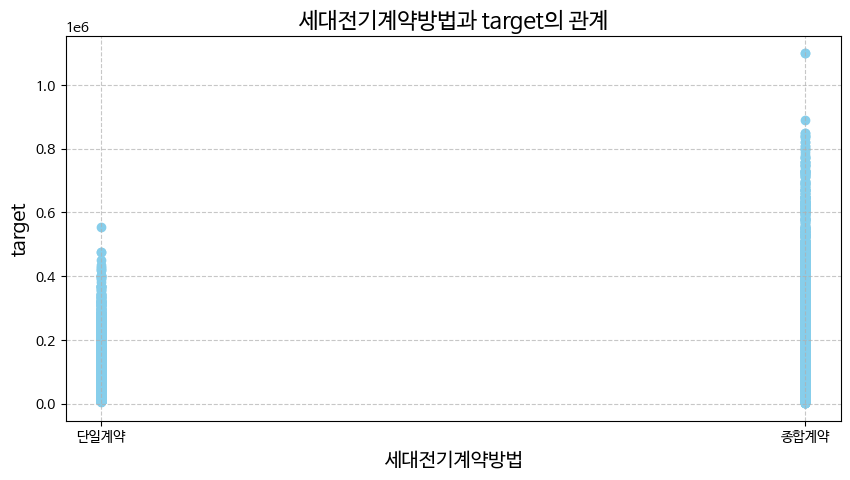

In [32]:
get_plot('세대전기계약방법', 'target', 10, 5, plot=True, rotation=0)

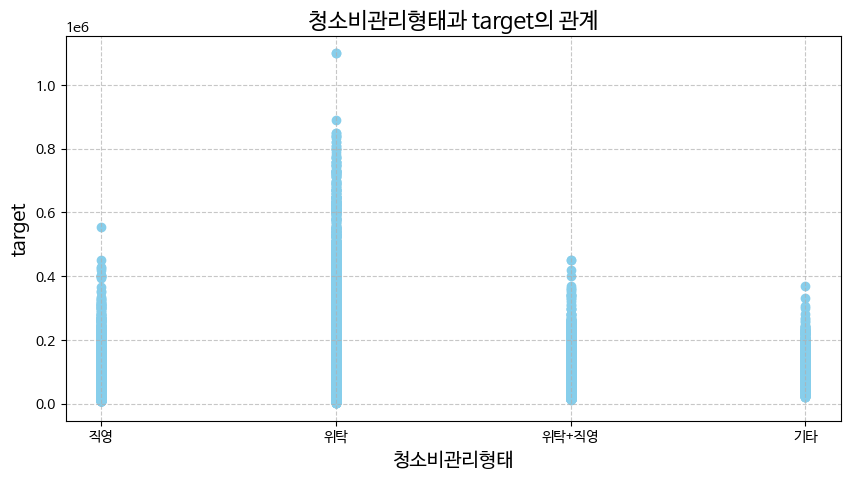

In [33]:
get_plot('청소비관리형태', 'target', 10, 5, plot=True, rotation=0)

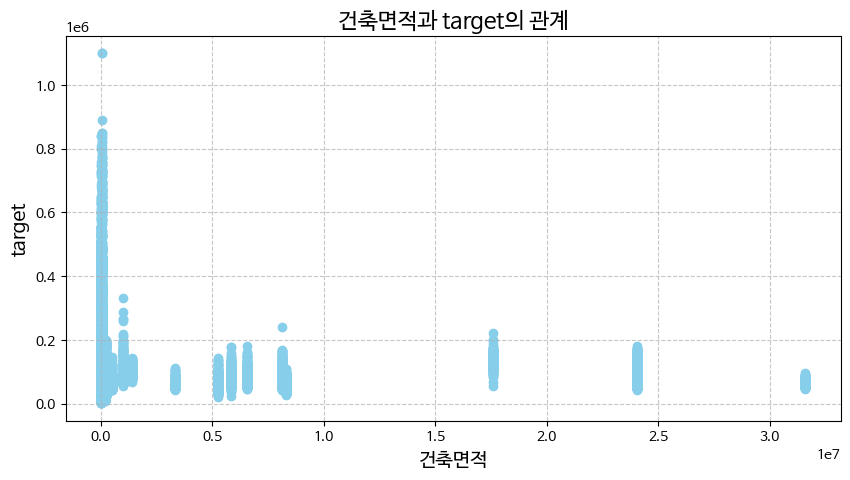

In [34]:
get_plot('건축면적', 'target', 10, 5, plot=True, rotation=0)

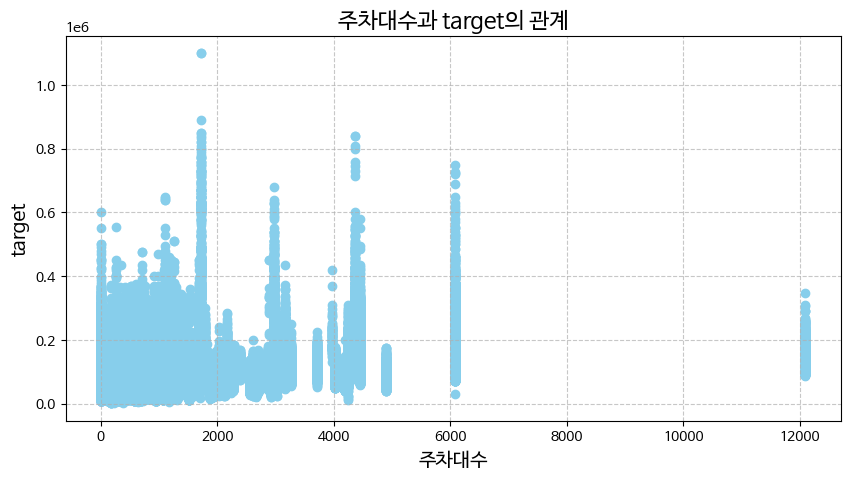

In [35]:
get_plot('주차대수', 'target', 10, 5, plot=True, rotation=0)

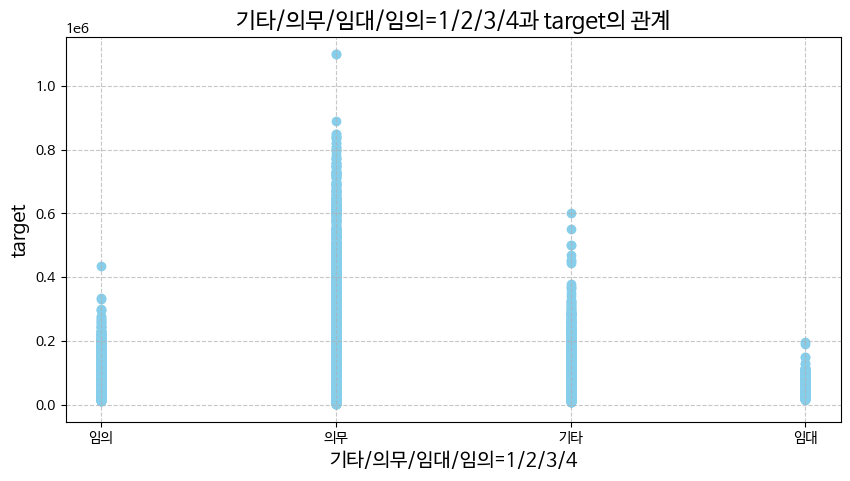

In [36]:
get_plot('기타/의무/임대/임의=1/2/3/4', 'target', 10, 5, plot=True, rotation=0)

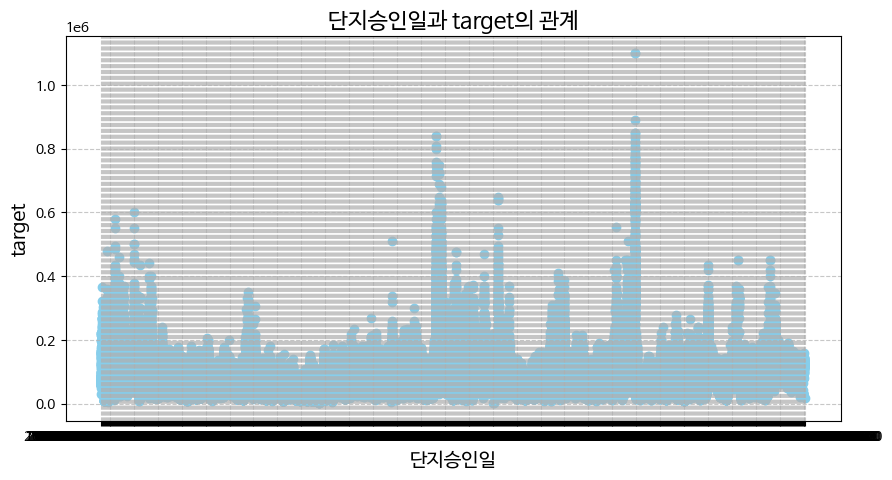

In [37]:
get_plot('단지승인일', 'target', 10, 5, plot=True, rotation=0)

In [94]:
dt['사용허가여부'].value_counts()

Y    249259
Name: 사용허가여부, dtype: int64

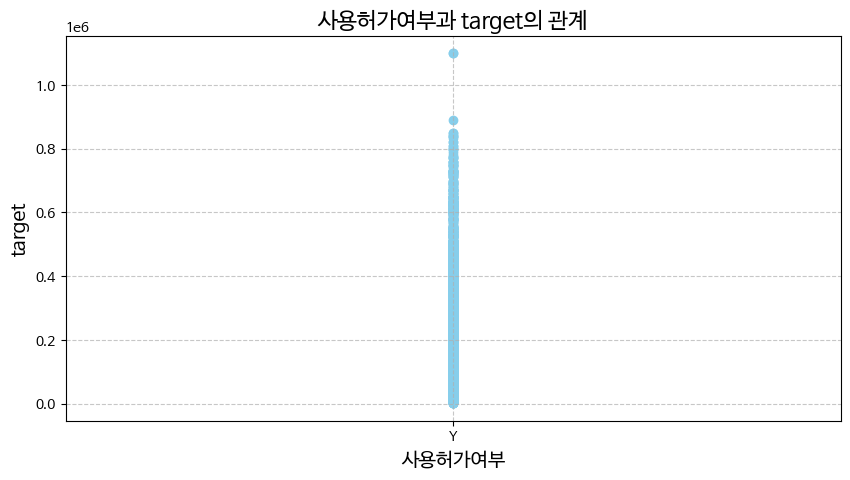

In [38]:
get_plot('사용허가여부', 'target', 10, 5, plot=True, rotation=0)

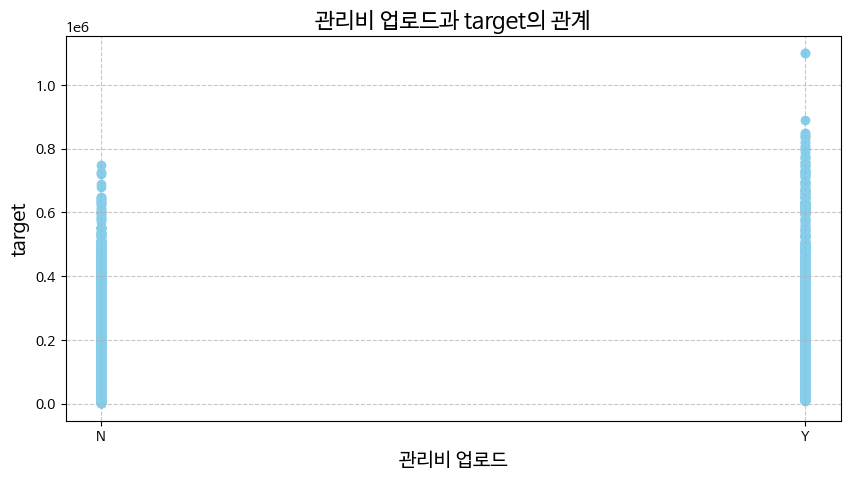

In [39]:
get_plot('관리비 업로드', 'target', 10, 5, plot=True, rotation=0)

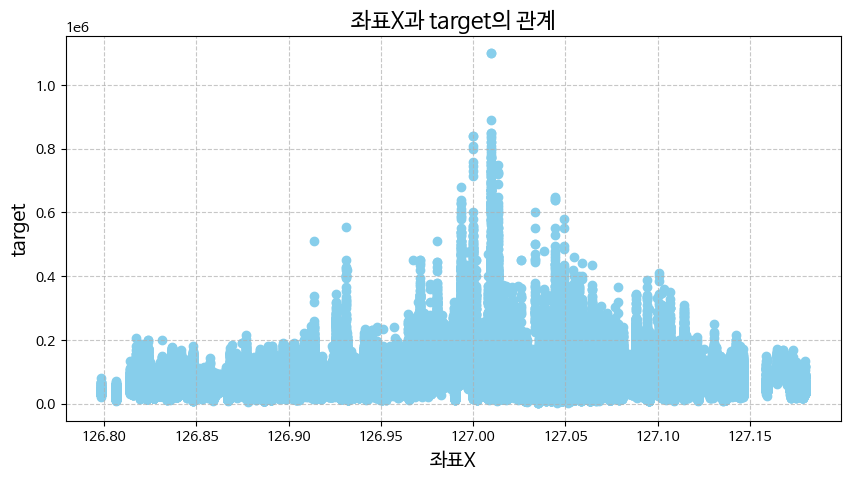

In [40]:
get_plot('좌표X', 'target', 10, 5, plot=True, rotation=0)

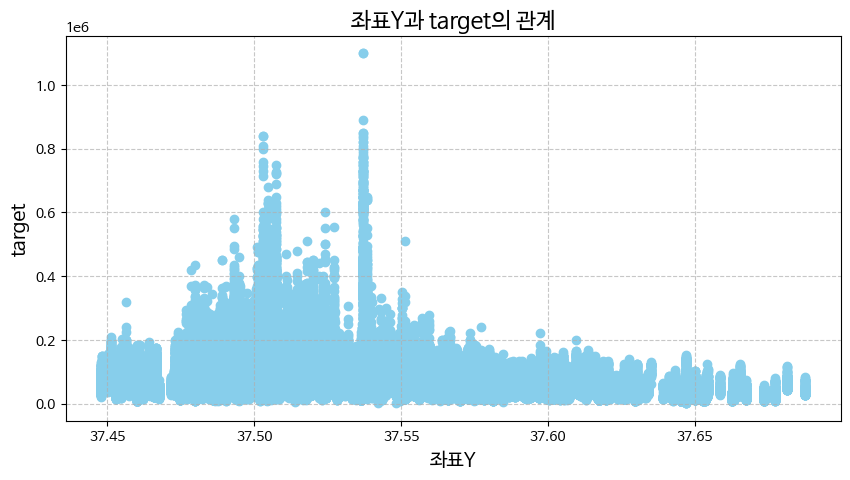

In [41]:
get_plot('좌표Y', 'target', 10, 5, plot=True, rotation=0)

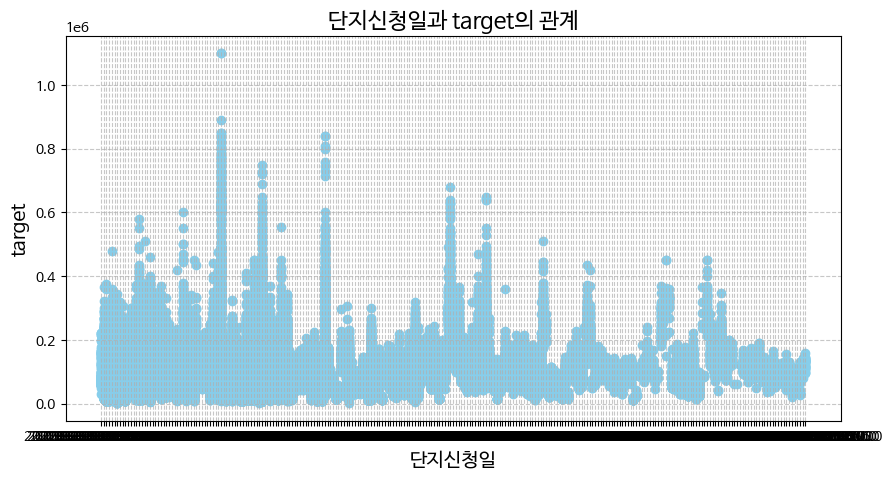

In [42]:
get_plot('단지신청일', 'target', 10, 5, plot=True, rotation=0)

---

구분선

---


In [2]:
# 필요한 데이터를 load 하겠습니다. 경로는 환경에 맞게 지정해주면 됩니다.
train_path = '/data/ephemeral/home/data/train.csv'
test_path  = '/data/ephemeral/home/data/test.csv'
bus = pd.read_csv('/data/ephemeral/home/data/bus_feature.csv')
subway = pd.read_csv('/data/ephemeral/home/data/subway_feature.csv')

In [3]:
bus.head(5)

,노드 ID,정류소번호,정류소명,X좌표,Y좌표,정류소 타입
0,100000001,1001,종로2가사거리,126.987752,37.569808,중앙차로
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,중앙차로
2,100000003,1003,명륜3가.성대입구,126.998251,37.582581,중앙차로
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,중앙차로
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,중앙차로


In [4]:
subway.head(5)

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387
